# chapter4.2+@

---

In [6]:
import numpy as np 
import pandas as pd

---

# 1. 나이브베이즈알고리즘

`-` $x_j$

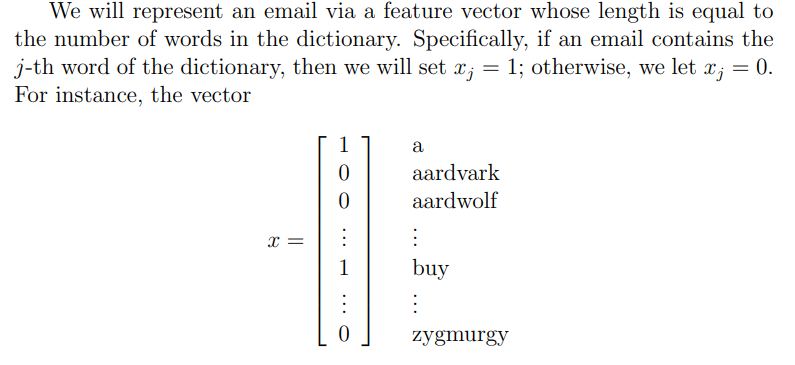

x에 j-th word가 속해져있는가에 따라 해당 j-th 단어가 들어가 있으면 x문장은 1로 분류되고 아니면 0으로 분류된다.

In [5]:
def f1(x,key):
    lst = []
    for i in range(len(x)):
        if key == x[i] :
            lst.append(1)
        else :
            lst.append(0)
    return np.array(lst)

In [25]:
x= 'i will finish my homework'
x.split(' ')

def fxj(x,key):
    if f1(x.split(' '),key).sum() > 0: # 해당 문장에 빈도가 1이상이면 1로 치환
        return 1
    else :
        return 0
    
fxj(x,'will')

1

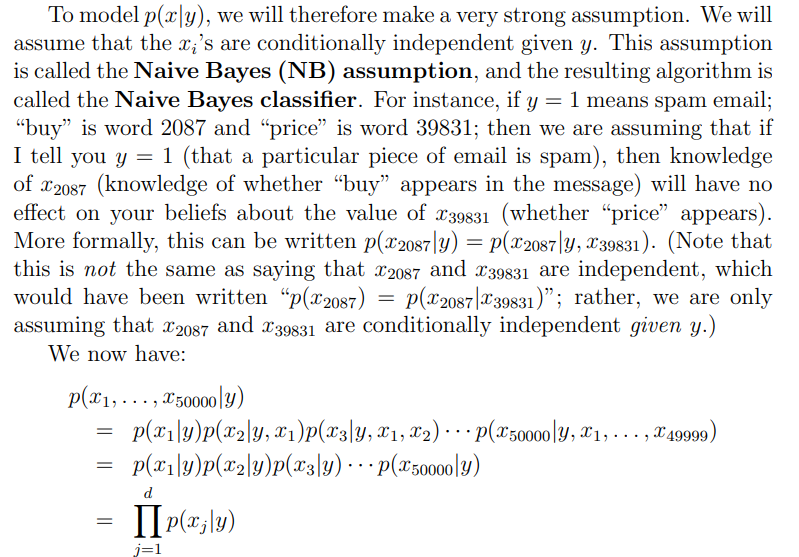

## `-` 나이브베이즈 확률 분포

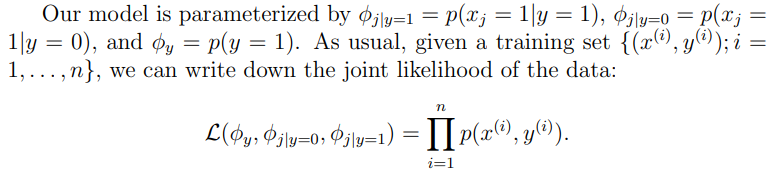

모델의 파라미터
- $\phi_{y} = y$가 1일 확률 
- $\phi_{j|y=1} = y$가 1일때, x문장에 j-th word가 있는 확률 
- $\phi_{j|y=0} = y$가 0일때, x문장에 j-th word가 있는 확률 


- $\prod^n_{i=1}p(x^i,y^i)$ = 결합 확률 분포 x와 y가 동시에 일어날 확률 

## `-` the maximum likelihood estimates

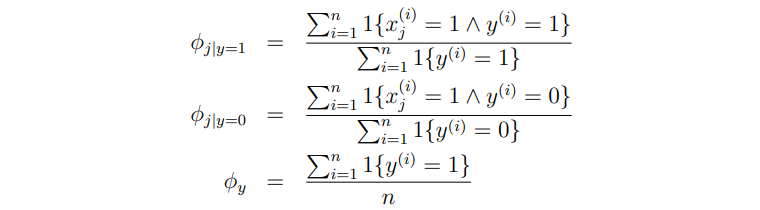

- i부터 n까지의 사건에서 
- j-th 단어의 출현이 있다면 1, 없으면 0
- y가 조건에 참이면 1, 아니면 0

`-` 실습

- 긍정문과 부정문을 분류해보고자 한다.

In [169]:
x = [('i love you', 1), # 긍정
     ('i miss you', 1),
     ('i can do it',1),
     ('i hate you', 0), # 부정
     ('i worry about that' ,0)]

x_train = [x[i][0] for i in range(len(x))]
x_train= [x_train[i].split(' ') for i in range(len(x))]
y = [x[i][1] for i in range(len(x))]
x,y

([('i love you', 1),
  ('i miss you', 1),
  ('i can do it', 1),
  ('i hate you', 0),
  ('i worry about that', 0)],
 [1, 1, 1, 0, 0])

j-th = love라고 할 때, 해당 단어의 확률분포
$$
\phi_{y} = 3/5 \\
\phi_{j|y=1} = 1/3 \\
\phi_{j|y=0} = 0/2 \\
$$

따라서 love가 포함된 문장이 긍정문일 확률은?
- $p(y=1|x_j)$

In [170]:
a = 1/3*3/5  #p(x|y=1) * p(y=1)
b = (1/3*3/5 + 0/2*2/5) #p(x|y=1)* p(y=1) + p(x|y=0)* p(y=0)
a/b #p(y=1|x_j)

1.0

## `-` to make a prediction

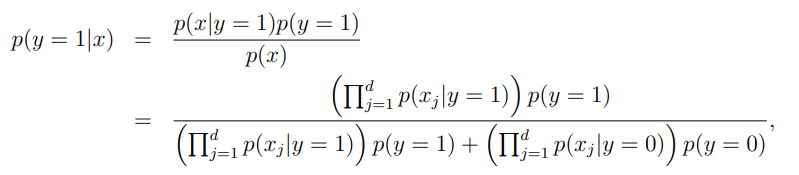

- 모든 파라미터를 fit 했다면 새로운 예제를 위와 같은 계산으로 간단히 예측을 할 수 있다.

- 여기서 d는 예측하려는 문장의 어휘별 길이를 의미한다.

## `-` 라플라스 스무딩

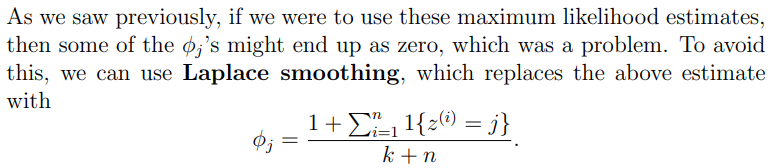

---

# `-` Multinomial event model.

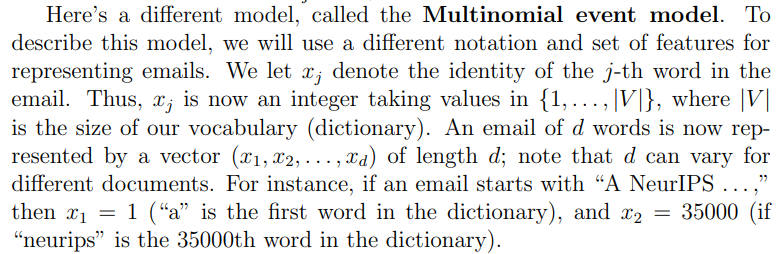

- Multinomial event model이란 다른 모델이 있고 다른 노테이션을 사용할 것이다.
- $x_j$는 1~|V|까지의 값을 가질 것임
- |V|는 중복되지 않은 고유한 단어의 수
- 또한 d는 x의 길이를 나타냄

- 이 모델은 문장에서 어떤 단어가 출현했다면 그대로 1로 반환되는 것이 아니라 문장내에서 빈도 수를 보는 것


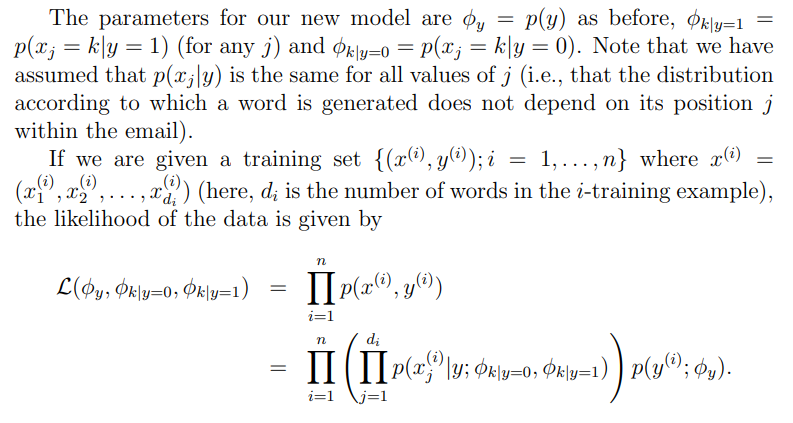

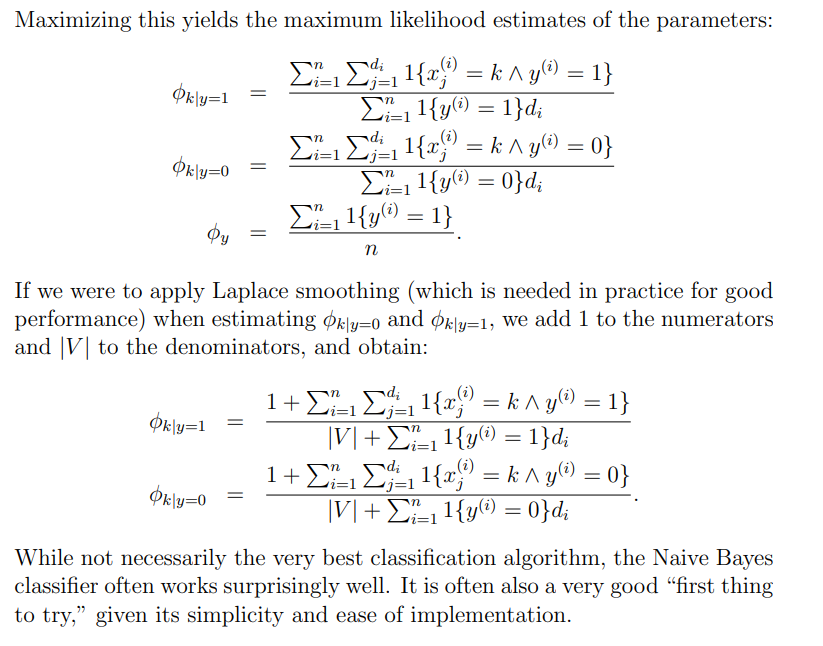

---

In [171]:
def f1(x,key):
    lst = []
    for i in range(len(x)):
        if key == x[i] :
            lst.append(1)
        else :
            lst.append(0)
    return np.array(lst)

In [172]:
#d 중복되지 않는 고유 어휘의 숫자
d = [k for k in set([element for sublist in x_train for element in sublist])]

len(d),len(x)#n 트레이닝 셋 

(11, 5)

In [194]:
# 고유 어휘 1~d까지 훈련데이터1~n까지에서 존재한다면 1로 분류

con = [[f1(x_train[j],d[i]).tolist() for i in range(len(d))] for j in range(len(x_train))]

In [174]:
# 1로 분류된 단어를 d의 인덱스 반환
one= [np.array(con[i]).sum(axis=1).tolist() for i in range(len(x_train))]
one

[[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]]

In [175]:
# y가 1,0일지에 따라서 index 구분
num = sum([y[i]==1 for i in range(len(y))]) # y true num 
y[:num], y[num:]

([1, 1, 1], [0, 0])

In [176]:
# y가 1일때 각 단어의 출현합
x_j1 = np.array(one[:num]).sum(axis=0)
 # y기 0일때 각 단어의 출현합
x_j0 = np.array(one[num:]).sum(axis=0)
print('각문장별로 단어가 뽑혔는지')
x_j1, x_j0

각문장별로 단어가 뽑혔는지


(array([2, 0, 1, 0, 0, 3, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0]))

`-`라플라스 스무딩

In [177]:
# 라플라스 스무딩
# y가 1일 때, xj가 포함된 확률  
pxy1 = (x_j1+1) / (len(y[:num])+2)
# y가 0일 때, xj가 포함된 확률  
pxy0 = (x_j0+1) / (len(y[num:])+2)

In [178]:
df= pd.DataFrame({'word':d,
             'x_j1':x_j1+1,
             'x_j0':x_j0+1,
             'pxy1':pxy1,
             'pxy0':pxy0})
df

,word,x_j1,x_j0,pxy1,pxy0
0,you,3,2,0.6,0.50
1,that,1,2,0.2,0.50
2,it,2,1,0.4,0.25
3,about,1,2,0.2,0.50
4,hate,1,2,0.2,0.50
5,i,4,3,0.8,0.75
6,love,2,1,0.4,0.25
7,can,2,1,0.4,0.25
8,miss,2,1,0.4,0.25
9,worry,1,2,0.2,0.50


---

`-` "i can love you"문장의 긍정문이 확률은?

In [179]:
def g(test):
    lst = []
    a=df.word.values.tolist()
    b=test.split(' ')
    for i in range(len(a)):
        for j in range(len(b)):
            lst.append(a[i] == b[j])
    c = np.array(lst).reshape(len(a),len(b)).sum(axis=1) == 1
    return df.iloc[c,:]

In [180]:
def bayes(x):
    a = np.prod(x.loc[:,'pxy1'])*(len(y[:num])/ len(y))
    b = np.prod(x.loc[:,'pxy0'])*(len(y[num:])/ len(y))
    return a / (a+b)

In [186]:
bayes(g('i'))

0.6153846153846153

---

In [68]:
#k number 부여
dct = {v:k for k,v in enumerate(d)}
dct

{'you': 0,
 'that': 1,
 'it': 2,
 'about': 3,
 'hate': 4,
 'i': 5,
 'love': 6,
 'can': 7,
 'miss': 8,
 'worry': 9,
 'do': 10}

---

`-` 더 많은 데이터를 학습 시켜보자

In [168]:
import random

# Positive sentences
positive_sentences = [
    "I love this beautiful day!",
    "The movie was fantastic and uplifting.",
    "This book is absolutely amazing.",
    "The food at the restaurant was delicious.",
    "The service at the store was excellent.",
    "I'm really happy with the results.",
    "The vacation was absolutely perfect.",
    "This song always cheers me up.",
    "The team played exceptionally well.",
    "I'm grateful for the support I received."
]

# Negative sentences
negative_sentences = [
    "I hate this terrible weather.",
    "The movie was disappointing and boring.",
    "This book is incredibly dull.",
    "The food at the restaurant was awful.",
    "The service at the store was terrible.",
    "I'm feeling really down today.",
    "The trip turned out to be a disaster.",
    "This song always makes me sad.",
    "The team performed poorly.",
    "I'm frustrated with the lack of progress."
]

# Generate a train set with random positive and negative sentences
def generate_train_set(size=100):
    train_set = []
    for _ in range(size // 2):
        positive_sentence = random.choice(positive_sentences)
        negative_sentence = random.choice(negative_sentences)
        train_set.append((1,positive_sentence))
        train_set.append((0,negative_sentence))
    return train_set

# Generate a train set with size 100 containing random positive and negative sentences
xxx = generate_train_set(size=300)

(1,'')
(1,"")
(0,'')
(0,'')

In [132]:
class bayes():
    def f1(x,key):
        lst = []
        for i in range(len(x)):
            if key == x[i] :
                lst.append(1)
            else :
                lst.append(0)
        return np.array(lst)
    
    
    def __init__(self,x):
        x.sort(reverse=True)
        self.x = [x[i][1] for i in range(len(x))]
        #self.x_train = [[element.lower() for element in sublist] for sublist in self.x]
        self.x_train = [self.x[i].split(' ') for i in range(len(self.x))]
        self.y = [x[i][0] for i in range(len(self.x))]
        
        self.d = [k for k in set([element for sublist in self.x_train for element in sublist])]

        self.con = [[f1(self.x_train[j],self.d[i]).tolist() for i in range(len(self.d))] for j in range(len(self.x_train))]
        
        self.one= [np.array(self.con[i]).sum(axis=1).tolist() for i in range(len(self.x_train))]
        
        self.num = sum([self.y[i]==1 for i in range(len(self.y))]) # y true num 
        self.y_true = y[:self.num]
        self.y_false = y[self.num:]
        
        # y가 1일때 각 단어의 출현합
        self.x_j1 = np.array(self.one[:self.num]).sum(axis=0)
         # y기 0일때 각 단어의 출현합
        self.x_j0 = np.array(self.one[self.num:]).sum(axis=0)
        
        
        #라플라스 스무딩
        # y가 1일 때, xj가 포함된 확률  
        self.pxy1 = (self.x_j1+1) / (len(self.y[:self.num])+2)
        # y가 0일 때, xj가 포함된 확률  
        self.pxy0 = (self.x_j0+1) / (len(self.y[self.num:])+2)
        
        self.df= pd.DataFrame({'word':self.d,
                      'x_j1':self.x_j1,
                      'x_j0':self.x_j0,
                       'pxy1':self.pxy1,
                      'pxy0':self.pxy0})
        
    def dataframe(self):
        return self.df
    
    def test(self,x):
        lst = []
        a=self.df.word.values.tolist()
        b=x.split(' ')
        for i in range(len(a)):
            for j in range(len(b)):
                lst.append(a[i] == b[j])
        c = np.array(lst).reshape(len(a),len(b)).sum(axis=1) == 1
        return self.df.iloc[c,:]
    
    def test_p(self,x):
        self.test(x)
        a = np.prod(self.test(x).loc[:,'pxy1'])*(len(self.y[:self.num])/ len(self.y))
        b = np.prod(self.test(x).loc[:,'pxy0'])*(len(self.y[self.num:])/ len(self.y))
        return a / (a+b)


In [134]:
good = bayes(xxx)

In [193]:
good.test_p('I can love you')

0.9760119940029985